In [ ]:
NAME_STUDENT_1 = "Tianze Wang"
NAME_STUDENT_2 = "Egor Lomagin"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import seaborn as sb
%matplotlib inline

In [2]:
from IPython.display import Markdown, display

In [3]:
sb.set(font_scale=2)
sb.set_style('white')

## MoneyBall (5 points, 1+2+1+1)
In the early 2000s, 2 baseball scouts completely changed the game of baseball by analysing the available data about baseball players and hiring the best ones.
The [MoneyBall dataset](https://www.openml.org/d/41021) contains this data (click the link for more details). The goal is to accurately predict the number of 'runs' each player can score. 

In [4]:
moneyball = oml.datasets.get_dataset(41021)
X, attribute_names = moneyball.get_data(return_attribute_names=True)
# Describe the data with pandas, just to get an overview
df = pd.DataFrame(X, columns=attribute_names)

In [5]:
display(Markdown(moneyball.description))

**Author**: MITx  

**Source**: [Kaggle](https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/data), originally from [The Analytics Edge course on EdX](https://www.edx.org/course/analytics-edge-mitx-15-071x-3). Data collected from [baseball-reference.com](baseball-reference.com)  

**Please cite**:   



**Moneyball**  

In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. They didn't do it using a bat or glove, and they certainly didn't do it by throwing money at the issue; in fact, money was the issue. They didn't have enough of it, but they were still expected to keep up with teams that had much deeper pockets. This is where Statistics came riding down the hillside on a white horse to save the day. This data set contains some of the information that was available to Beane and DePodesta in the early 2000s, and it can be used to better understand their methods.



### Attributes  

This data set contains a set of variables that Beane and DePodesta focused heavily on. They determined that stats like on-base percentage (OBP) and slugging percentage (SLG) were very important when it came to scoring runs, however they were largely undervalued by most scouts at the time. This translated to a gold mine for Beane and DePodesta. Since these players weren't being looked at by other teams, they could recruit these players on a small budget. The variables are as follows:



Team  

League  

Year  

Runs Scored (RS)  

Runs Allowed (RA)  

Wins (W)  

On-Base Percentage (OBP)  

Slugging Percentage (SLG)  

Batting Average (BA)  

Playoffs (binary)  

RankSeason  

RankPlayoffs  

Games Played (G)  

Opponent On-Base Percentage (OOBP)  

Opponent Slugging Percentage (OSLG)  



### Acknowledgements  

This data set is referenced in The Analytics Edge course on EdX during the lecture regarding the story of Moneyball. The data itself is gathered from baseball-reference.com. Sports-reference.com is one of the most comprehensive sports statistics resource available, and I highly recommend checking it out.



Inspiration

It is such an important skill in today's world to be able to see the "truth" in a data set. That is what DePodesta was able to do with this data, and it unsettled the entire system of baseball recruitment. Beane and DePodesta defined their season goal as making it to playoffs. With that in mind, consider these questions:



How does a team make the playoffs?

How does a team win more games?

How does a team score more runs?

They are all simple questions with simple answers, but now it is time to use the data to find the "truth" hidden in the numbers.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null float32
League          1232 non-null float32
Year            1232 non-null float32
RS              1232 non-null float32
RA              1232 non-null float32
W               1232 non-null float32
OBP             1232 non-null float32
SLG             1232 non-null float32
BA              1232 non-null float32
Playoffs        1232 non-null float32
RankSeason      244 non-null float32
RankPlayoffs    244 non-null float32
G               1232 non-null float32
OOBP            420 non-null float32
OSLG            420 non-null float32
dtypes: float32(15)
memory usage: 72.3 KB


In [7]:
df.describe()

Team       League         Year           RS           RA  \
count  1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean     15.669642     0.500000  1988.957764   715.081970   715.081970   
std       9.720413     0.500203    14.819622    91.534294    93.079941   
min       0.000000     0.000000  1962.000000   463.000000   472.000000   
25%       7.000000     0.000000  1976.750000   652.000000   649.750000   
50%      16.000000     0.500000  1989.000000   711.000000   709.000000   
75%      23.000000     1.000000  2002.000000   775.000000   774.250000   
max      38.000000     1.000000  2012.000000  1009.000000  1103.000000   

                 W          OBP          SLG           BA     Playoffs  \
count  1232.000000  1232.000000  1232.000000  1232.000000  1232.000000   
mean     80.904221     0.326331     0.397342     0.259273     0.198052   
std      11.458138     0.015013     0.033267     0.012907     0.398696   
min      40.000000     0.277000     0.301000     0.214000     0.000000   
25%      73.000000     0.317000     0.375000     0.251000     0.000000   
50%      81.000000     0.326000     0.396000     0.260000     0.000000   
75%      89.000000     0.337000     0.421000     0.268000     0.000000   
max     116.000000     0.373000     0.491000     0.294000     1.000000   

       RankSeason  RankPlayoffs            G        OOBP        OSLG  
count  244.000000    244.000000  1232.000000  420.000000  420.000000  
mean     2.122951      1.717213     3.918831    0.332264    0.419743  
std      1.738350      1.095234     0.624366    0.015295    0.026510  
min      0.000000      0.000000     0.000000    0.294000    0.346000  
25%      1.000000      1.000000     4.000000    0.321000    0.401000  
50%      2.000000      2.000000     4.000000    0.331000    0.419000  
75%      3.000000      3.000000     4.000000    0.343000    0.438000  
max      7.000000      4.000000     7.000000    0.384000    0.499000

In [8]:
df.head()

Team  League    Year     RS     RA     W    OBP    SLG     BA  Playoffs  \
0   0.0     1.0  2012.0  734.0  688.0  81.0  0.328  0.418  0.259       0.0   
1   1.0     1.0  2012.0  700.0  600.0  94.0  0.320  0.389  0.247       1.0   
2   2.0     0.0  2012.0  712.0  705.0  93.0  0.311  0.417  0.247       1.0   
3   3.0     0.0  2012.0  734.0  806.0  69.0  0.315  0.415  0.260       0.0   
4   4.0     1.0  2012.0  613.0  759.0  61.0  0.302  0.378  0.240       0.0   

   RankSeason  RankPlayoffs    G   OOBP   OSLG  
0         NaN           NaN  4.0  0.317  0.415  
1         3.0           4.0  4.0  0.306  0.378  
2         4.0           3.0  4.0  0.315  0.403  
3         NaN           NaN  4.0  0.331  0.428  
4         NaN           NaN  4.0  0.335  0.424

# **Part 1**

1 . Visually explore the data. Plot the distribution of each feature (e.g. histograms), as well as the target. Visualize the dependency of the target on each feature (use a 2d scatter plot). Is there anything that stands out? Is there something that you think might require special treatment?
- Feel free to create additional plots that help you understand the data
- Only visualize the data, you don't need to change it (yet)

## Nominal features

### Team

In [9]:
print(df['Team'].unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38.]


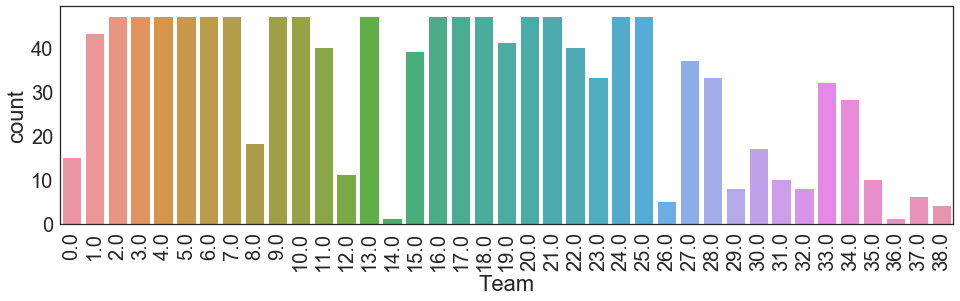

In [10]:
plt.figure(figsize=(16, 4))
sb.countplot(data=df, x='Team')
plt.xticks(rotation=90);

### Year

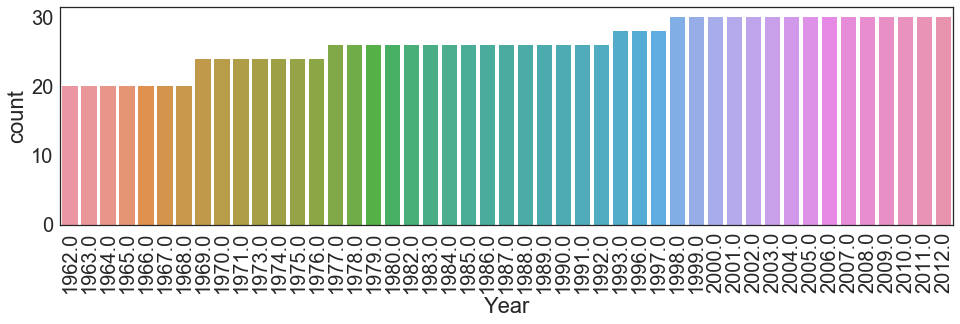

In [11]:
plt.figure(figsize=(16, 4))
sb.countplot(data=df, x='Year')
plt.xticks(rotation=90);

### League, RankSeason, RankPlayoffs, G, Playoffs

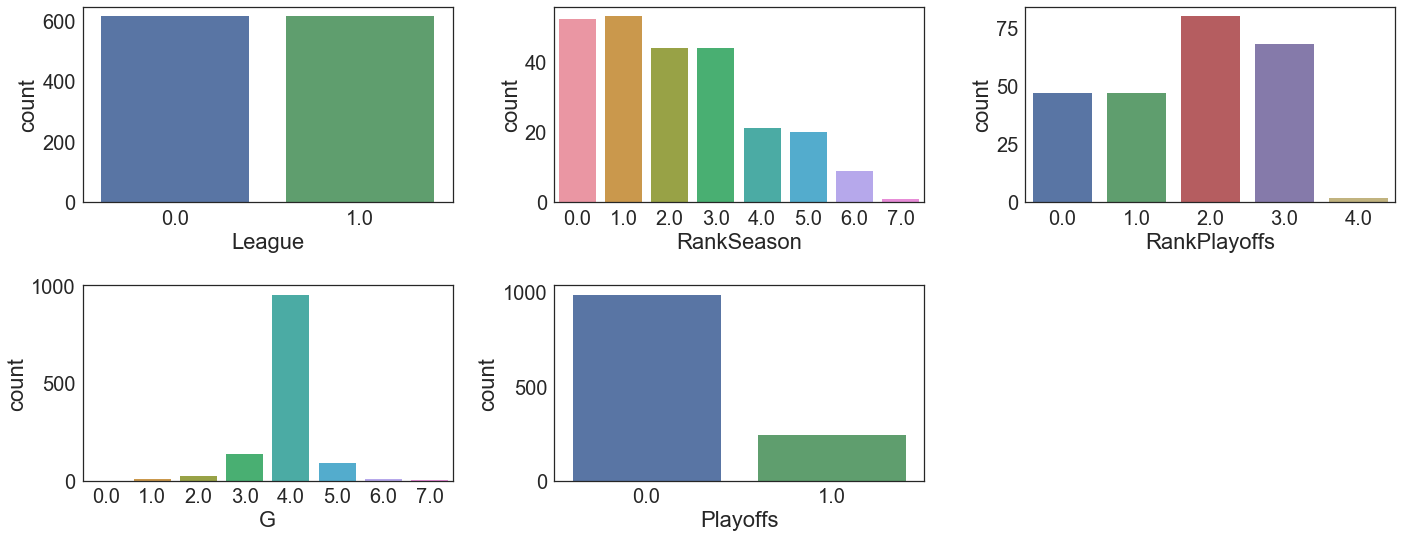

In [12]:
plt.figure(figsize=(20, 8))
sb.countplot(data=df, x='League', ax=plt.subplot2grid((2, 3), (0, 0)))
sb.countplot(data=df, x='RankSeason', ax=plt.subplot2grid((2, 3), (0, 1)))
sb.countplot(data=df, x='RankPlayoffs', ax=plt.subplot2grid((2, 3), (0, 2)))
sb.countplot(data=df, x='G', ax=plt.subplot2grid((2, 3), (1, 0)))
sb.countplot(data=df, x='Playoffs', ax=plt.subplot2grid((2, 3), (1, 1)))
plt.tight_layout()

## Numerical features

In [13]:
fig = plt.figure(figsize=(20, 15))

sb.distplot(df['RA'], ax=plt.subplot2grid((3, 3), (0, 0)))
sb.distplot(df['W'], ax=plt.subplot2grid((3, 3), (0, 1)))
sb.distplot(df['OBP'], ax=plt.subplot2grid((3, 3), (0, 2)))
sb.distplot(df['SLG'], ax=plt.subplot2grid((3, 3), (1, 0)))
sb.distplot(df['BA'], ax=plt.subplot2grid((3, 3), (1, 1)))
sb.distplot(df['OOBP'].dropna(), ax=plt.subplot2grid((3, 3), (1, 2)))
sb.distplot(df['OSLG'].dropna(), ax=plt.subplot2grid((3, 3), (2, 0)))
sb.distplot(df['RS'], color='red', ax=plt.subplot2grid((3, 3), (2, 1)))
plt.tight_layout()

## Target-feature correlation

### Nominal features correleation

In [14]:
fig = plt.figure(figsize=(20, 15))

df.plot.scatter('Team', 'RS', ax=plt.subplot2grid((3, 3), (0, 0)))
sb.boxplot(x='League', y='RS', data=df, ax=plt.subplot2grid((3, 3), (0, 1)))
df.plot.scatter('Year', 'RS', ax=plt.subplot2grid((3, 3), (0, 2)))
sb.boxplot(x='Playoffs', y='RS', data=df, ax=plt.subplot2grid((3, 3), (1, 0)))
sb.boxplot(x='RankSeason', y='RS', data=df, ax=plt.subplot2grid((3, 3), (1, 1)))
sb.boxplot(x='RankPlayoffs', y='RS', data=df, ax=plt.subplot2grid((3, 3), (1, 2)))
sb.boxplot(x='G', y='RS', data=df, ax=plt.subplot2grid((3, 3), (2, 0)))

plt.tight_layout()

In [86]:
fig = plt.figure(figsize=(20, 6))

sb.boxplot('Year', 'RS', data=df)
plt.xticks(rotation=90);

In [87]:
fig = plt.figure(figsize=(20, 6))

sb.boxplot('Team', 'RS', data=df)
plt.xticks(rotation=90);

These plots show that **Playoffs** and **League** features may contain information about target variable **RS**. Also **Year** vs **RS** scatterplot shows interesting pattern that may also be usefull to predict **RS**.
Other features don't show obvious patterns for predicting **RS**.

### Statistical analysis of binary features correlation with target variable

In [16]:
from scipy.stats import ttest_ind

#### TTest for groups with different **Playoff** feature values

In [17]:
ttest_ind(df.loc[df['Playoffs'] == 0, 'RS'], df.loc[df['Playoffs'] == 1, 'RS'], equal_var=False)

Ttest_indResult(statistic=-15.362261542424653, pvalue=4.614363360049747e-42)

This test shows that difference of means **RS** in groups divided by **Playoffs** feature is statistically significant, which might indicate that this feature can be used to predict **RS**.

#### TTest for groups with different **League** feature values

In [18]:
ttest_ind(df.loc[df['League'] == 0, 'RS'], df.loc[df['League'] == 1, 'RS'], equal_var=False)

Ttest_indResult(statistic=6.760030696685303, pvalue=2.1417813252710097e-11)

This test shows that difference of means **RS** in groups divided by **League** feature is statistically significant, which might indicate that this feature can be used to predict **RS**.

### Numerical features correlation

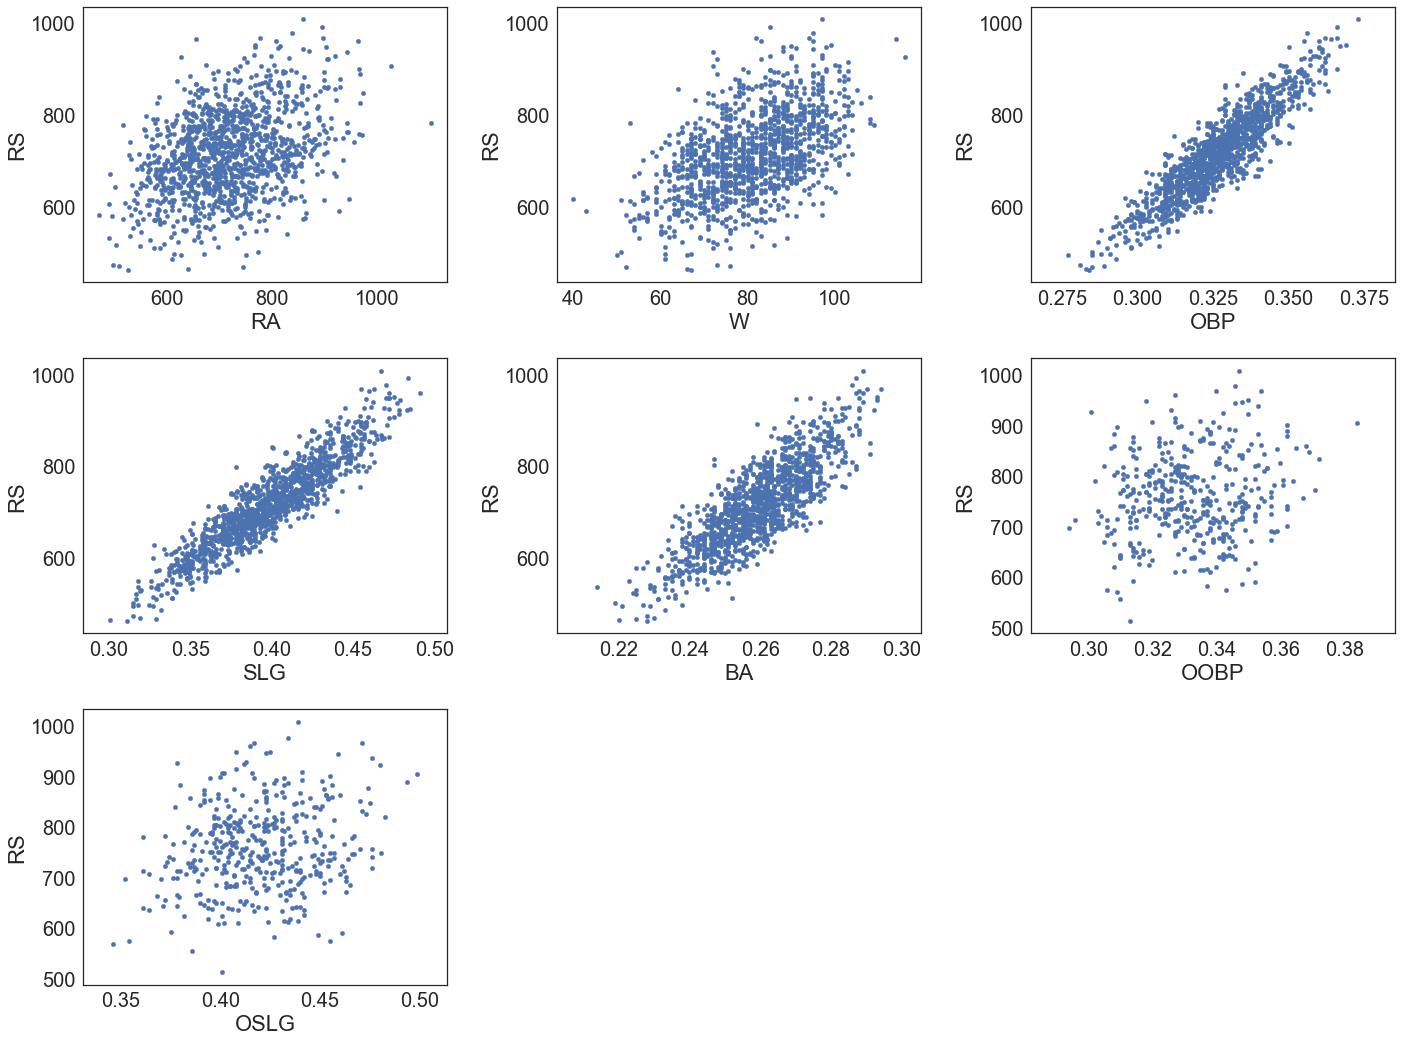

In [19]:
fig = plt.figure(figsize=(20, 15))

df.plot.scatter('RA', 'RS', ax=plt.subplot2grid((3, 3), (0, 0)))
df.plot.scatter('W', 'RS', ax=plt.subplot2grid((3, 3), (0, 1)))
df.plot.scatter('OBP', 'RS', ax=plt.subplot2grid((3, 3), (0, 2)))
df.plot.scatter('SLG', 'RS', ax=plt.subplot2grid((3, 3), (1, 0)))
df.plot.scatter('BA', 'RS', ax=plt.subplot2grid((3, 3), (1, 1)))
df.plot.scatter('OOBP', 'RS', ax=plt.subplot2grid((3, 3), (1, 2)))
df.plot.scatter('OSLG', 'RS', ax=plt.subplot2grid((3, 3), (2, 0)))
plt.tight_layout()

Here we see that **OBP**, **SLG** and **BA** features have high correlation with target variable **RS**.

### Statistical analysis of numerical features correlation with target variable

In [20]:
from scipy.stats import pearsonr

In [21]:
print('Pearson OBP-RS coef: {0[0]}; pval: {0[1]}'.format(pearsonr(df['OBP'], df['RS'])))
print('Pearson SLG-RS coef: {0[0]}; pval: {0[1]}'.format(pearsonr(df['SLG'], df['RS'])))
print('Pearson BA-RS: {0[0]}; pval: {0[1]}'.format(pearsonr(df['BA'], df['RS'])))

Pearson OBP-RS coef: 0.9004921913146973; pval: 0.0
Pearson SLG-RS coef: 0.918739914894104; pval: 0.0
Pearson BA-RS: 0.8269997239112854; pval: 6.41471024081763e-310


Pearson correlation shows that there are strong, statistically significant (pval ~ 0) positive correlations between **OBP**, **SLG**, **BA** features and target variable **RS**.

In [22]:
print('Pearson RA-RS: {0[0]}; pval: {0[1]}'.format(pearsonr(df['RA'], df['RS'])))
print('Pearson W-RS: {0[0]}; pval: {0[1]}'.format(pearsonr(df['W'], df['RS'])))

Pearson RA-RS: 0.380138635635376; pval: 1.22609154400933e-43
Pearson W-RS: 0.5117446780204773; pval: 3.499451419407588e-83


**RA** and **W** features have statistically significant correlations with **RS** too, but they are not as strong as for **OBP**, **SLG** and **BA** features.

# **Part 2**

2 . Compare all linear regression algorithms that we covered in class (Linear Regression, Ridge, Lasso and ElasticNet), as well as kNN. Evaluate using cross-validation and the $R^2$ score, with the default parameters. Does scaling the data with StandardScaler help? Provide a concise but meaningful interpretation of the results.
- Preprocess the data as needed (e.g. are there nominal features that are not ordinal?). If you don't know how to proceed, remove the feature and continue.

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

Define which variables will be treated as categorical and which as numerical.

In [24]:
categorical = ['Team', 'League', 'Playoffs', 'G']# 'RankSeason', 'RankPlayoffs',
numerical = ['RA', 'W', 'OBP', 'SLG', 'BA', 'Year']#'OOBP', 'OSLG', 

In [25]:
X = df.drop(['RS'], axis=1)

In [26]:
y = df['RS']

### Fill null values

We've tried several different null-filling strategies, but in the end decided just to drop features, containing null-values, since there were too many null values in them.

In [27]:
#X['RankSeason'] = X['RankSeason'].fillna(X['RankSeason'].mode()[0]) # replace nan with most frequent value
#X['RankPlayoffs'] = X['RankPlayoffs'].fillna(X['RankPlayoffs'].mode()[0]) # replace nan with most frequent value
#X['OOBP'] = X['OOBP'].fillna(X['OOBP'].mean())# replace nan with mean valeus
#X['OSLG'] = X['OSLG'].fillna(X['OSLG'].mean())# replace nan with mean values

In [28]:
cat_X = X[categorical].as_matrix()
num_X = X[numerical].as_matrix()

### Cat features onehot encoding

In [29]:
onehot = OneHotEncoder()
cat_X = onehot.fit_transform(cat_X)

In [30]:
cat_X = cat_X.toarray()

### Num polynomial features generation

Generate degree 2 polynomial features on numerical variables.

In [31]:
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

In [32]:
num_X = poly.fit_transform(num_X)

### Concatenation

In [33]:
num_X.shape

(1232, 21)

In [34]:
cat_X.shape

(1232, 51)

In [35]:
X = np.concatenate((num_X, cat_X), axis=1)

In [36]:
X.shape

(1232, 72)

### Evaluation of models with default parameters

In [37]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [38]:
lr_scaled = make_pipeline(RobustScaler(), LinearRegression())
lr_nonscaled = LinearRegression()
lasso_scaled = make_pipeline(RobustScaler(), Lasso())
lasso_nonscaled = Lasso()
ridge_scaled = make_pipeline(RobustScaler(), Ridge())
ridge_nonscaled = Ridge()
elnet_scaled = make_pipeline(RobustScaler(), ElasticNet())
elnet_nonscaled = ElasticNet()
knn_scaled = make_pipeline(RobustScaler(), KNeighborsRegressor())
knn_nonscaled = KNeighborsRegressor()

#### With scaled numerical features

In [39]:
lr_score = cross_val_score(lr_scaled, X, y, scoring='r2', cv=10)
lasso_score = cross_val_score(lasso_scaled, X, y, scoring='r2', cv=10)
ridge_score = cross_val_score(ridge_scaled, X, y, scoring='r2', cv=10)
elnet_score = cross_val_score(elnet_scaled, X, y, scoring='r2', cv=10)
knn_score = cross_val_score(knn_scaled, X, y, scoring='r2', cv=10)

In [40]:
print("Linear regerssion avg R2 score: ", lr_score.mean())
print("Lasso avg R2 score: ", lasso_score.mean())
print("Ridge avg R2 score: ", ridge_score.mean())
print("Elnet avg R2 score: ", elnet_score.mean())
print("KNN avg R2 score: ", knn_score.mean())

Linear regerssion avg R2 score:  0.9209395922003625
Lasso avg R2 score:  0.9194417296637495
Ridge avg R2 score:  0.9234448408123253
Elnet avg R2 score:  0.9026843199966473
KNN avg R2 score:  0.8828574671531662


In [41]:
for i, score in enumerate(lr_score):
    print('Score for fold set {}: {}'.format(i+1, score))

Score for fold set 1: 0.9142623555672184
Score for fold set 2: 0.8936917949413504
Score for fold set 3: 0.9264071937859417
Score for fold set 4: 0.9363110263233483
Score for fold set 5: 0.9150723089005187
Score for fold set 6: 0.9169007088836444
Score for fold set 7: 0.9100542648838963
Score for fold set 8: 0.9186011326144707
Score for fold set 9: 0.9396828827842588
Score for fold set 10: 0.938412253318976


**(Not shown here)** For some sets of paramters LinearRegression had overfit on some sets folds and gave very bad (negative) R^2 scores on corresponding test folds. This happened because there are many features and dataset is not very big.

#### With non-scaled numerical features

In [42]:
lr_ns_score = cross_val_score(lr_nonscaled, X, y, scoring='r2', cv=10)
lasso_ns_score = cross_val_score(lasso_nonscaled, X, y, scoring='r2', cv=10)
ridge_ns_score = cross_val_score(ridge_nonscaled, X, y, scoring='r2', cv=10)
elnet_ns_score = cross_val_score(elnet_nonscaled, X, y, scoring='r2', cv=10)
knn_ns_score = cross_val_score(knn_nonscaled, X, y, scoring='r2', cv=10)

C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the n

In [43]:
print("Linear regerssion avg R2 score: ", lr_ns_score.mean())
print("Lasso avg R2 score: ", lasso_ns_score.mean())
print("Ridge avg R2 score: ", ridge_ns_score.mean())
print("Elnet avg R2 score: ", elnet_ns_score.mean())
print("KNN avg R2 score: ", knn_ns_score.mean())

Linear regerssion avg R2 score:  0.9209395921542466
Lasso avg R2 score:  0.9228974640376713
Ridge avg R2 score:  0.9235815749261939
Elnet avg R2 score:  0.9229633746409286
KNN avg R2 score:  0.6992507074823702


When comparing training process of given models and their cv scores on scaled and non-scaled data several differences can be noticed.
- First, sklearn raises `ConvergenceWarning: Objective did not converge.` when model which involves l1 reguarisation (Lasso, ElasticNet) is being trained. Scaling featres is done to imporve the convergence of optimisation algorithms and thus non-scaled X may cause problems with optimising loss function. The fact that only l1 regularised models were affected can be explained by different solvers handling different regularisations and that solver that supports l1 regularisation might be more sensitive to scaling.
- Second, strangely enough, average scores for Lasso, Risge and Elnet are higher for models trained on non-scaled data. We could not find good explanation for this fact, but we think this could be a coinsidence.

# **Part 3**

3 . Do a default, shuffled train-test split and optimize the linear models for the degree of regularization ($alpha$) and choice of penalty (L1/L2). For Ridge and  Lasso, plot a curve showing the effect of the training and test set performance ($R^2$) while increasing the degree of regularization for different penalties. For ElasticNet, plot a heatmap $alpha \times l1\_ratio \rightarrow R^2$ using test set performance.
Report the optimal performance. Again, provide a concise but meaningful interpretation. What does the regularization do? Can you get better results?
- Think about how you get the L1/L2 loss. This is not a hyperparameter in regression.
- We've seen how to generate such heatmaps in Lecture 3.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.metrics import r2_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Ridge alpha selection

In [48]:
ridge_alpha = np.linspace(0.0001, 50, 1000)
ridge_train_scores = []
ridge_test_scores = []

In [49]:
for alpha in ridge_alpha:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ridge_train_scores.append(r2_score(y_train, model.predict(X_train)))
    ridge_test_scores.append(r2_score(y_test, model.predict(X_test)))

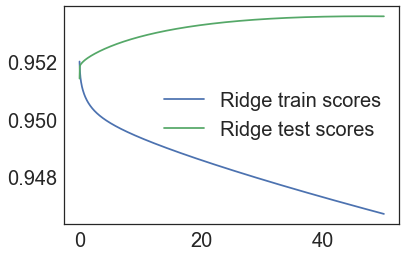

In [50]:
plt.plot(ridge_alpha, ridge_train_scores, label='Ridge train scores')
plt.plot(ridge_alpha, ridge_test_scores, label='Ridge test scores')
plt.legend()

**Optimal alpha value**

In [51]:
optimal_ridge_alpha = ridge_alpha[np.argmax(ridge_test_scores)]
print(optimal_ridge_alpha)

46.94695305305306


### Lasso alpha selection

In [52]:
lasso_alpha = np.linspace(0, 1, 200)
lasso_train_scores = []
lasso_test_scores = []

In [53]:
for alpha in lasso_alpha:
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train, y_train)
    lasso_train_scores.append(r2_score(y_train, model.predict(X_train)))
    lasso_test_scores.append(r2_score(y_test, model.predict(X_test)))

C:\Data\Soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


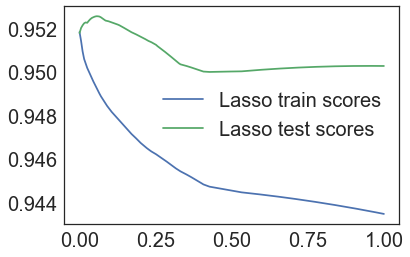

In [54]:
plt.plot(lasso_alpha, lasso_train_scores, label='Lasso train scores')
plt.plot(lasso_alpha, lasso_test_scores, label='Lasso test scores')
plt.legend()

Optimal alpha value

In [55]:
optimal_lasso_alpha = lasso_alpha[np.argmax(lasso_test_scores)]
print(optimal_lasso_alpha)

0.05527638190954774


#### l1/l2 alpha selection conclusion
With the increase of regularization coefficient performance on test data grows until certain point and then starts to decline. Performance on training set goes down with the increase of alpha.
This happens because with the intruduction of regularisation, models overfit training data less and less (and thus training score goes down) and start to generalize more and more (test score goes up). But at some point regularisation starts to harm ability to model data and models start to underfit (test score goes down again).
In addition, we want to highlight the instability of results (optimal hyperparamters selected) and their dependence on train_test_split. This happens because hold-out test strategy was used. Hyperparameter optimization with cross validation would yield much more stable and generalized over the whole dataset results.

### ElasticNet alpha-l1-ratio selection

In [56]:
elnet_alpha = np.linspace(0.001, 1, 50)
elnet_l1_ratio = np.linspace(0, 1, 10)

In [57]:
_elnet_alpha = []
_elnet_l1_ratio = []
elnet_train_scores = []
elnet_test_scores = []

In [58]:
for alpha in elnet_alpha:
    for l1_ratio in elnet_l1_ratio:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        _elnet_alpha.append(alpha)
        _elnet_l1_ratio.append(l1_ratio)
        elnet_train_scores.append(r2_score(y_train, model.predict(X_train)))
        elnet_test_scores.append(r2_score(y_test, model.predict(X_test)))

C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Data\Soft\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [59]:
elnet_test_df = pd.DataFrame()
elnet_test_df['Alpha'] = _elnet_alpha
elnet_test_df['L1-ratio'] = _elnet_l1_ratio
elnet_test_df['R2'] = elnet_test_scores

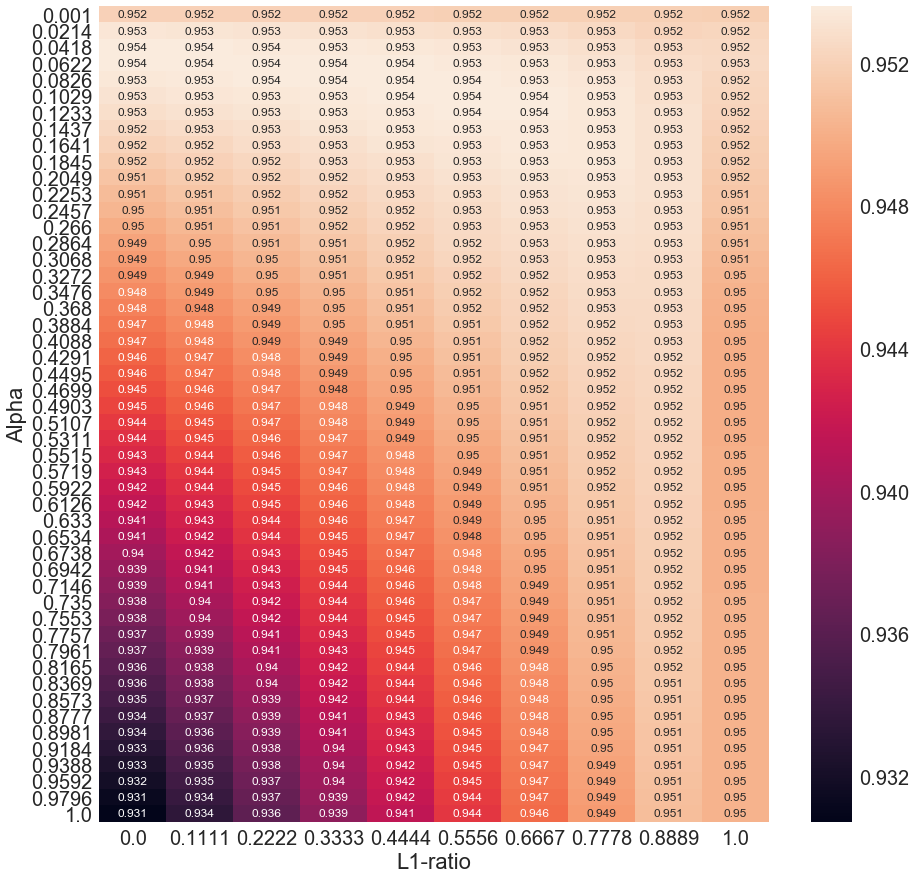

In [60]:
plt.figure(figsize=(15, 15))
sb.heatmap(elnet_test_df.pivot('Alpha', 'L1-ratio', 'R2'), annot=True, annot_kws={'size':12}, fmt='.3g',
           xticklabels=np.round(elnet_l1_ratio, 4), yticklabels=np.round(elnet_alpha, 4))

Optimal alpha and l1-ratio values

In [80]:
optimal_elnet_alpha = _elnet_alpha[np.argmax(elnet_test_scores)]
optimal_elnet_l1_ratio = _elnet_l1_ratio[np.argmax(elnet_test_scores)]
print(optimal_elnet_alpha)
print(optimal_elnet_l1_ratio)
print(np.max(elnet_test_scores))

0.062163265306122456
0.2222222222222222
0.9535965750705203


#### ElasticNet hyperparameter optimization conclusion
For ElasticNet gave best test score out of all regressors. This can be explained by ElasticNet being able to better generalize data or the fact that more parameters were tuned, and since no cross validation was used hyperparameters overfit the test set. However resulting color map is still interesting since it shows that there are sertain regions with higher scores (alpha $\in$ (0.0214, 0.1233), L1-ratio $\in$ (0, 0.33)) and regions with lower scores.

# **Part 4**

4 . Visualize the coefficients of the optimized models. Do they agree on which features are
important? Compare the results with the feature importances returned by a RandomForest. Does it agree with the linear models? What would look for when scouting for a baseball player?

In [62]:
onehot.feature_indices_

array([ 0, 39, 41, 43, 51], dtype=int32)

In [63]:
poly.n_output_features_

21

In [64]:
categorical

['Team', 'League', 'Playoffs', 'G']

In [65]:
def feature_no_to_feature_name(no):
    if no < poly.n_output_features_:
        return poly.get_feature_names(numerical)[no]
    else:
        no -= poly.n_output_features_
        ind = onehot.feature_indices_
        for i in range(len(ind) - 1):
            if ind[i] <= no < ind[i+1]:
                return categorical[i]+'_{0}'.format(no - ind[i])
        

In [66]:
optimal_ridge = Ridge(alpha=optimal_ridge_alpha)
optimal_ridge.fit(X_train, y_train)

Ridge(alpha=46.94695305305306, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
r2_score(y_test, optimal_ridge.predict(X_test))

0.9535804932784595

In [68]:
optimal_lasso = Lasso(alpha=optimal_lasso_alpha, max_iter=100000)
optimal_lasso.fit(X_train, y_train)

Lasso(alpha=0.05527638190954774, copy_X=True, fit_intercept=True,
   max_iter=100000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
r2_score(y_test, optimal_lasso.predict(X_test))

0.9525525471942641

In [81]:
optimal_elnet = ElasticNet(alpha=optimal_elnet_alpha, l1_ratio=optimal_elnet_l1_ratio, max_iter=100000)
optimal_elnet.fit(X_train, y_train)

ElasticNet(alpha=0.062163265306122456, copy_X=True, fit_intercept=True,
      l1_ratio=0.2222222222222222, max_iter=100000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
r2_score(y_test, optimal_elnet.predict(X_test))

0.9535965750705203

In [70]:
feature_ids = list(range(X.shape[1]))
feature_names = [feature_no_to_feature_name(i) for i in feature_ids]

In [83]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 26))
ax[0].invert_yaxis()
ax[0].barh(feature_ids, optimal_ridge.coef_)
ax[1].barh(feature_ids, optimal_lasso.coef_)
ax[2].barh(feature_ids, optimal_elnet.coef_)
ax[0].set_yticks(feature_ids)
ax[0].set_yticklabels(feature_names);

ax[0].set_title('Ridge coeffs')
ax[1].set_title('Lasso coeffs')
ax[2].set_title('Elnet coeffs')
plt.tight_layout()

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train);

In [74]:
r2_score(y_test, rf.predict(X_test))

0.9443765657571244

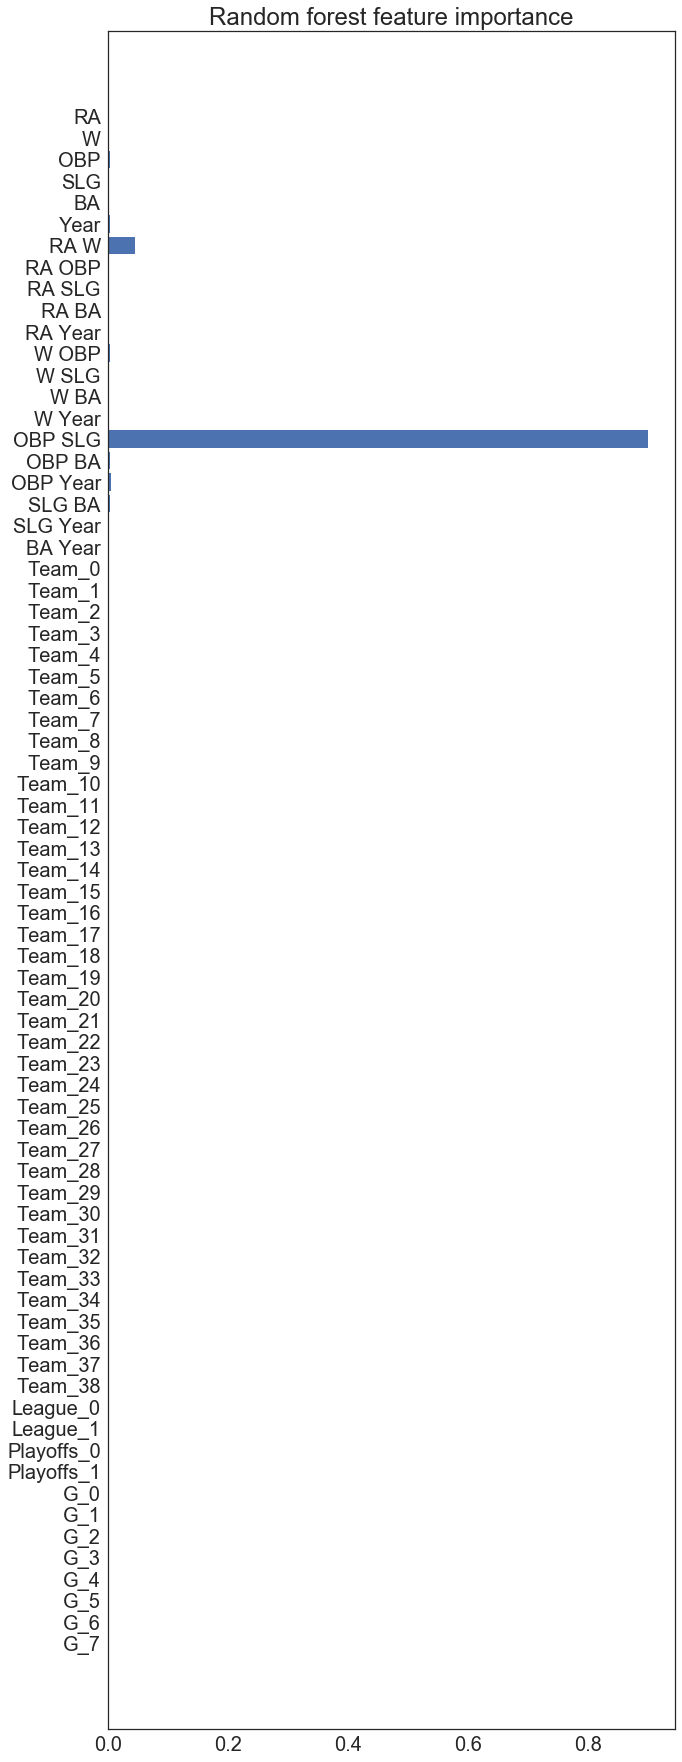

In [75]:
plt.figure(figsize=(10, 25))
plt.gca().invert_yaxis()
plt.barh(feature_ids, rf.feature_importances_)
plt.gca().set_yticks(feature_ids)
plt.gca().set_yticklabels(feature_names);
plt.title('Random forest feature importance')
plt.tight_layout()

Top 10 features Ridge

In [76]:
sorted(zip(feature_names, np.abs(optimal_ridge.coef_)), key=lambda x: x[1], reverse=True)[:10]

[('OBP SLG', 15.017411694821778),
 ('SLG', 13.548525204095926),
 ('OBP', 12.92069068782445),
 ('SLG Year', 11.832753559540722),
 ('RA W', 11.145982571664833),
 ('OBP Year', 10.627103984161538),
 ('W SLG', 10.265647717415918),
 ('RA SLG', 9.773481173248662),
 ('Year', 9.068006689879182),
 ('SLG BA', 8.88778840221839)]

Top 10 features Lasso

In [77]:
sorted(zip(feature_names, np.abs(optimal_lasso.coef_)), key=lambda x: x[1], reverse=True)[:10]

[('OBP SLG', 42.69571726801197),
 ('W OBP', 27.424442640196826),
 ('SLG', 26.770875115469245),
 ('RA OBP', 19.743940826215585),
 ('RA W', 15.631592450842804),
 ('OBP', 11.195955916270886),
 ('Team_3', 10.482087988663228),
 ('Year', 9.162689683323896),
 ('Team_19', 8.46510408602794),
 ('Team_30', 7.64968432962059)]

Top 10 features ElasticNet

In [84]:
sorted(zip(feature_names, np.abs(optimal_elnet.coef_)), key=lambda x: x[1], reverse=True)[:10]

[('OBP SLG', 15.180751932101241),
 ('SLG', 13.599519445440745),
 ('OBP', 12.983611062430052),
 ('SLG Year', 11.834665128627963),
 ('RA W', 11.277618942371237),
 ('OBP Year', 10.643937763099997),
 ('W SLG', 10.310485293080193),
 ('RA SLG', 9.842547202384244),
 ('Year', 9.147469052596925),
 ('W OBP', 8.912117116462985)]

Top 10 features RandomForest

In [78]:
sorted(zip(feature_names, np.abs(rf.feature_importances_)), key=lambda x: x[1], reverse=True)[:10]

[('OBP SLG', 0.9004624878326635),
 ('RA W', 0.04525367023849741),
 ('OBP Year', 0.004638632652625884),
 ('OBP BA', 0.004287119058719962),
 ('Year', 0.004205023899801583),
 ('OBP', 0.003933697686605419),
 ('SLG BA', 0.0037727234642564523),
 ('W OBP', 0.003166084662052698),
 ('SLG Year', 0.002740574404127164),
 ('SLG', 0.0027105940825262577)]

The following observatios can be made based on feature weights
- Lasso, Ridge, ElasticNet and RandomForest assign high weight to `OBP SLG` feature. This can be explained by the fact that this feature contains information from both `OBP` and `SLG` which have strong correlation with target variable (see feature exploration).
- `RA W` feature has a second highest weight for RandomForest and has high weight for other regressors too. Both of those features showed to have correlation with target variable and their product have even stronger correlation (see plot below).
- Different products of `OBP` and `SLG` features got high scores too: `OBP Year`, `SLG Year`, `OBP BA`.

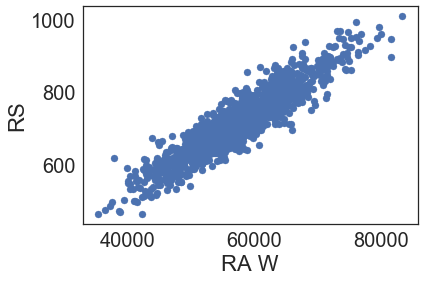

In [79]:
plt.scatter(df['RA'] * df['W'], df['RS'])
plt.xlabel('RA W')
plt.ylabel('RS')

When choosig new players for a team it is important to look at `OBP` and `SLG` features and their product (higher is better), `RA` and `W` features and their product (higher is better). Also, statitical analysis of `League` and `Playoffs` features showed that they split objects into groups differences in `RS` in which are statistically significant.

However, hyperparameter optimization and feature importance calculation was done without using cross-validation, which makes acquired results unstable (highly dependant on train_test_split output).